# Bike sharing demand in Seoul

## Aim:- To predict the count of bike will used in a duriation of 1 hour. 

In [233]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [234]:
data_frame=pd.read_csv('SeoulBikeData.csv',encoding='unicode_escape')

In [235]:
data_frame.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [236]:
data_frame.shape

(8760, 14)

In [237]:
#null values
#cardinality
#relation between categorical and target feature
#relation between numerical and target feature
#pairplot
#correlation
#outliers

## Checking the info

In [238]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## Checking out null values

In [239]:
data_frame.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**There are no null values in the data**

## Checking out cardinality of the features

Cardinality means number of unique values in each column

In [240]:
for cols in data_frame.columns:
    value_count=len(data_frame[cols].unique())
    print('{} has {} unique values'.format(cols,value_count))

Date has 365 unique values
Rented Bike Count has 2166 unique values
Hour has 24 unique values
Temperature(°C) has 546 unique values
Humidity(%) has 90 unique values
Wind speed (m/s) has 65 unique values
Visibility (10m) has 1789 unique values
Dew point temperature(°C) has 556 unique values
Solar Radiation (MJ/m2) has 345 unique values
Rainfall(mm) has 61 unique values
Snowfall (cm) has 51 unique values
Seasons has 4 unique values
Holiday has 2 unique values
Functioning Day has 2 unique values


## Relationship between the categorical features and target feature

In [241]:
def cat_tar_rel(col):
    print('Relation between {} and Target feature(Rented Bike Count)'.format(col))
    data=data_frame.groupby(col)['Rented Bike Count'].median()
    fig = px.bar(x=data.index,y=data.values)
    fig.show()
    fig=px.line(x=data.index,y=data.values)
    fig.show()

In [242]:
for cols in data_frame.columns:
    if data_frame[cols].dtype=='O':
        cat_tar_rel(cols)

Relation between Date and Target feature(Rented Bike Count)


Relation between Seasons and Target feature(Rented Bike Count)


Relation between Holiday and Target feature(Rented Bike Count)


Relation between Functioning Day and Target feature(Rented Bike Count)


**Findings**
- The data is grouped by median value and count is per hour
- The count of bikes shared is seasonal to the dates. 
- The highest demand in count was on 13-06-2017 and 16-06-2017 i.e 1436 and 1427.
- The demand was too low during winters i.e 200 and was high in summer i.e more than 905.
- Similarly, the demand was low during a holiday i.e 250.
- And it was a no-functioning day, the count is almost 0.

## Relation between numerical and target feature

In [243]:
#defining the function to plot the relation between numerical and target feature
def num_tar_rel(col):
    print('Relation between {} and Target feature(Rented Bike Count)'.format(col))
    data=data_frame.groupby(col)['Rented Bike Count'].median()
    fig=px.line(x=data.index,y=data.values)
    fig.show()
    values=data_frame.groupby(col)['Rented Bike Count'].median().values.tolist()
    index_values=data_frame.groupby(col)['Rented Bike Count'].median().index.tolist()
    max_index_value=values.index(max(values))
    min_index_value=values.index(min(values))
    max_value=index_values[max_index_value]
    min_value=index_values[min_index_value]
    print('Demand was high when {}: {} and was low when {}: {}'.format(col,max_value,col,min_value))

In [244]:
for cols in data_frame.columns:
    if data_frame[cols].dtype!='O':
        if cols!='Rented Bike Count':
            num_tar_rel(cols)
            print('------------------------------------------------------------------------------------------')

Relation between Hour and Target feature(Rented Bike Count)


Demand was high when Hour: 18 and was low when Hour: 4
------------------------------------------------------------------------------------------
Relation between Temperature(°C) and Target feature(Rented Bike Count)


Demand was high when Temperature(°C): 35.2 and was low when Temperature(°C): -15.4
------------------------------------------------------------------------------------------
Relation between Humidity(%) and Target feature(Rented Bike Count)


Demand was high when Humidity(%): 12 and was low when Humidity(%): 95
------------------------------------------------------------------------------------------
Relation between Wind speed (m/s) and Target feature(Rented Bike Count)


Demand was high when Wind speed (m/s): 7.2 and was low when Wind speed (m/s): 6.9
------------------------------------------------------------------------------------------
Relation between Visibility (10m) and Target feature(Rented Bike Count)


Demand was high when Visibility (10m): 1225 and was low when Visibility (10m): 328
------------------------------------------------------------------------------------------
Relation between Dew point temperature(°C) and Target feature(Rented Bike Count)


Demand was high when Dew point temperature(°C): 17.5 and was low when Dew point temperature(°C): -27.2
------------------------------------------------------------------------------------------
Relation between Solar Radiation (MJ/m2) and Target feature(Rented Bike Count)


Demand was high when Solar Radiation (MJ/m2): 1.27 and was low when Solar Radiation (MJ/m2): 0.15
------------------------------------------------------------------------------------------
Relation between Rainfall(mm) and Target feature(Rented Bike Count)


Demand was high when Rainfall(mm): 1.3 and was low when Rainfall(mm): 7.5
------------------------------------------------------------------------------------------
Relation between Snowfall (cm) and Target feature(Rented Bike Count)


Demand was high when Snowfall (cm): 0.0 and was low when Snowfall (cm): 7.1
------------------------------------------------------------------------------------------


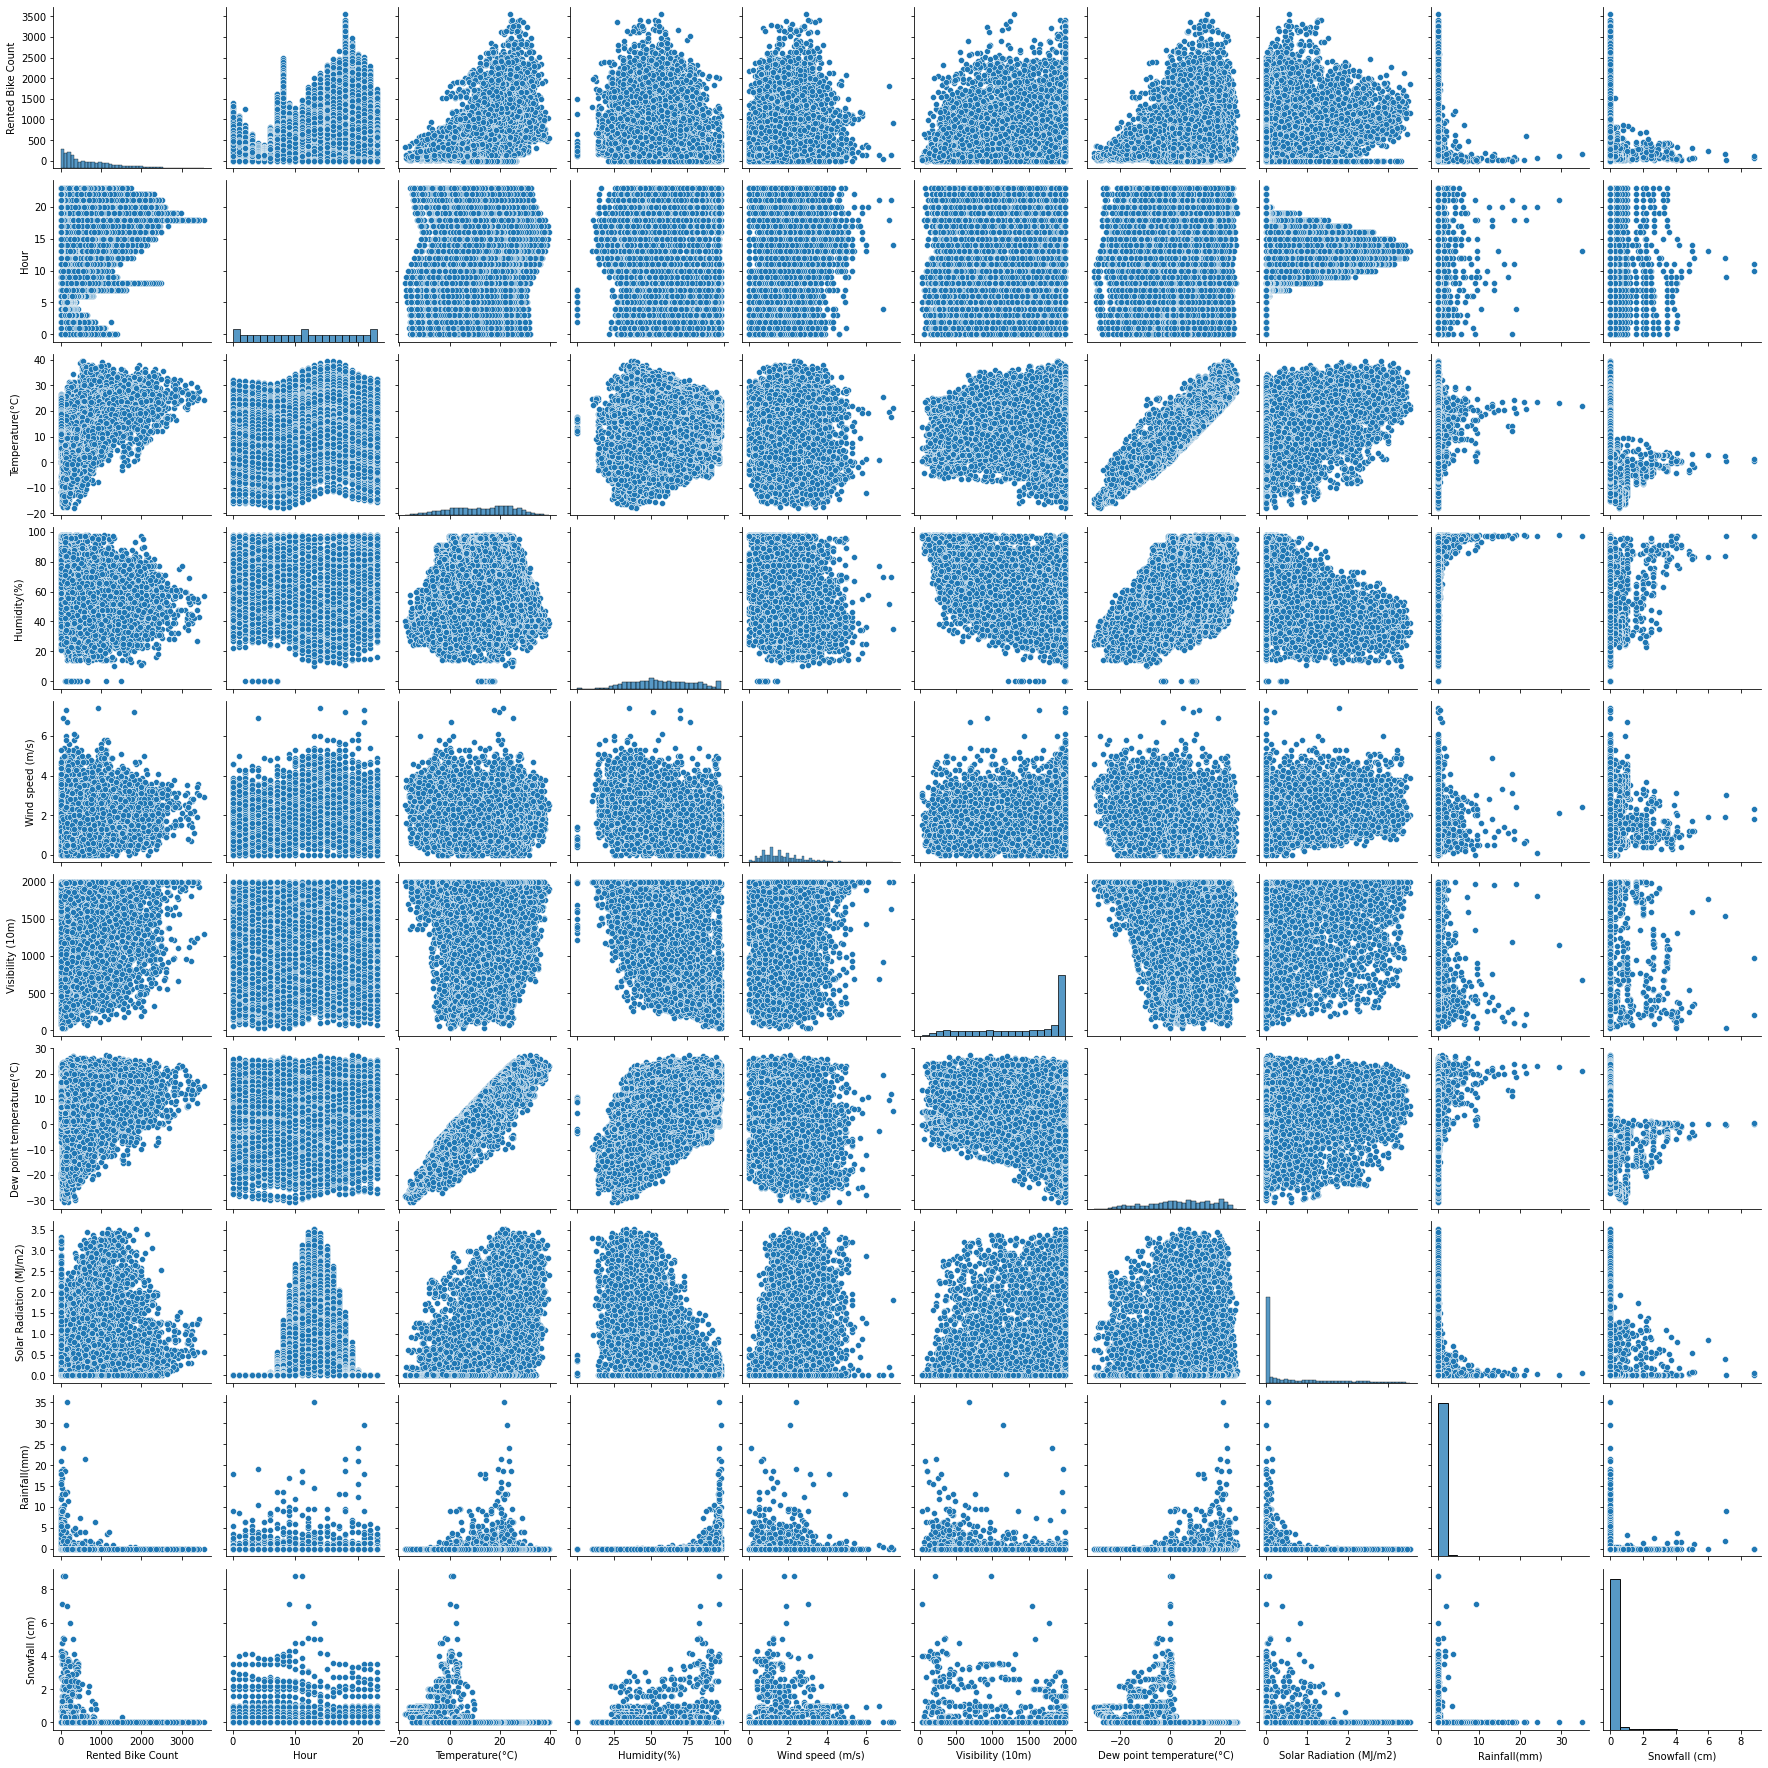

In [245]:
sns.pairplot(data_frame);

## Checking the correlation

In [246]:
data_frame.corr()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(°C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


<AxesSubplot:>

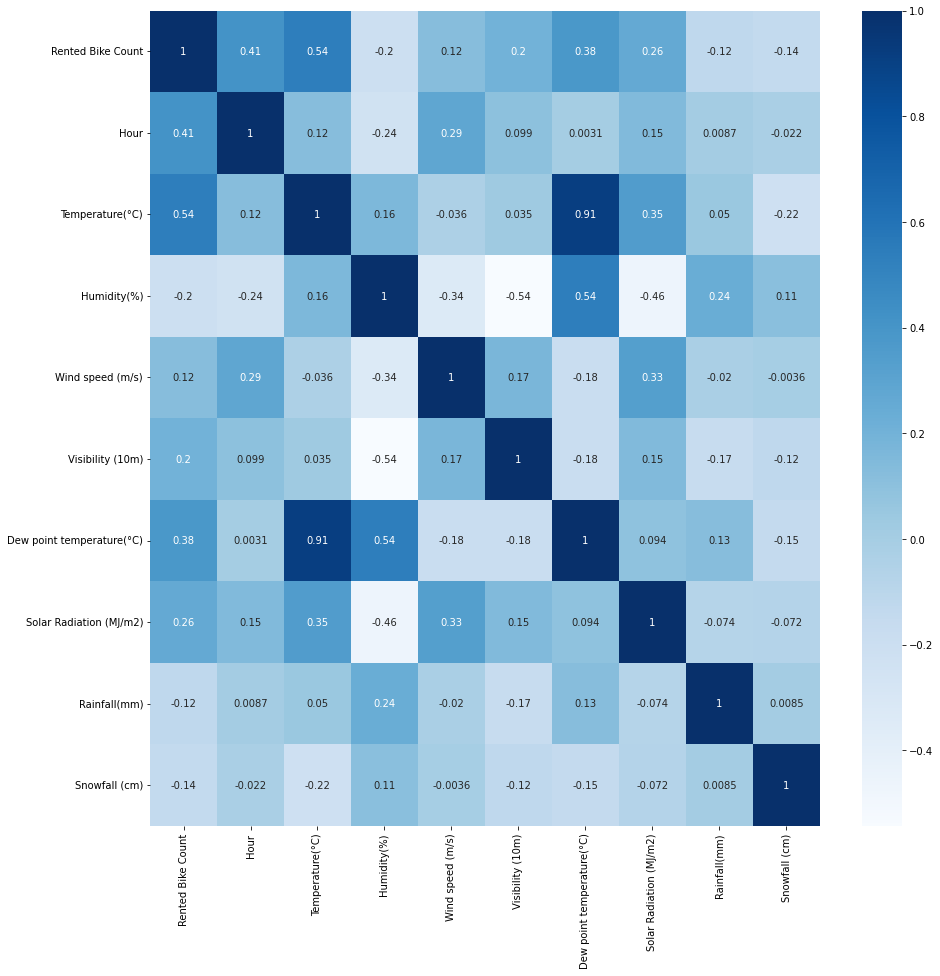

In [247]:
plt.figure(figsize=(15,15))
sns.heatmap(data_frame.corr(),annot=True,cmap='Blues')

**We can plot the corr only for numerical values**

In [248]:
#converting the categorical features into numerical features using label encoding
data=data_frame.copy()
for cols in data.columns:
    if data[cols].dtype=='O':
        rank=data[cols].value_counts().index
        mapping={i:k for k,i in enumerate(rank,0)}
        data[cols]=data[cols].map(mapping)

In [249]:
data_frame.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [250]:
#plotting the correlation again.

In [251]:
data_frame.corr()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(°C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


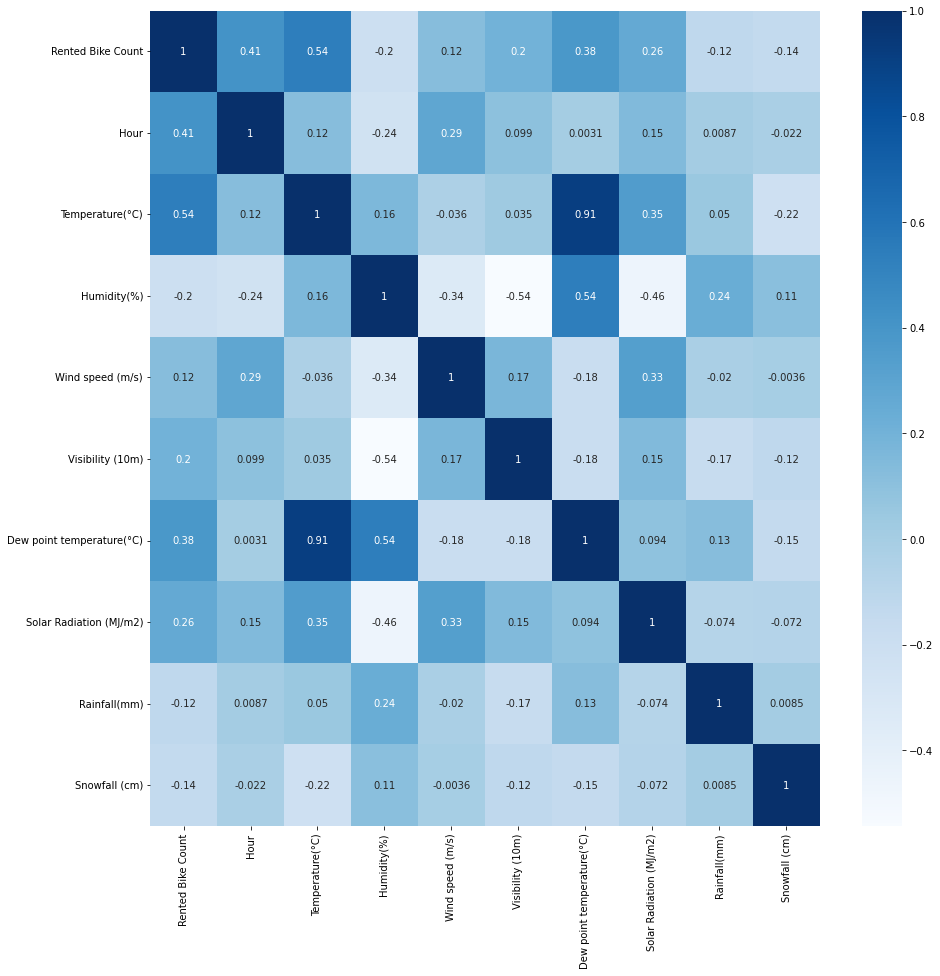

In [252]:
plt.figure(figsize=(15,15))
sns.heatmap(data_frame.corr(),annot=True,cmap='Blues');

In [253]:
#defining a function which extracts the features which has correlation equal or more than the given value.

In [254]:
correlation=data_frame.corr()
correlation

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(°C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


In [255]:
cor_data=correlation[correlation>0.5]
cor_data

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,NaN,0.538558,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hour,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature(°C),0.538558,NaN,1.000000,NaN,NaN,NaN,0.912798,NaN,NaN,NaN
Humidity(%),NaN,NaN,NaN,1.000000,NaN,NaN,0.536894,NaN,NaN,NaN
Wind speed (m/s),NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Visibility (10m),NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Dew point temperature(°C),NaN,NaN,0.912798,0.536894,NaN,NaN,1.000000,NaN,NaN,NaN
Solar Radiation (MJ/m2),NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Rainfall(mm),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Snowfall (cm),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [256]:
#defining a function to get the feature pairs which are correlated with the value more than or equal to the given threshold
def correlation(threshold_value):
    corr_features=[]
    for cols in cor_data:
        for val in cor_data[cols]:
            if val>threshold_value:
                cor_feature=cor_data[cor_data[cols]==val].index[0]
                if ([cor_feature,cols] not in corr_features)&([cols,cor_feature] not in corr_features):
                    if cor_feature!=cols:
                        percentage=val*100
                        print('{} and {} are {}% correlated'.format(cor_feature,cols,round(percentage,2)))
                        corr_features.append([cols,cor_feature])

In [260]:
threshold_value=input('Enter the value threshold between 0 and 1:')
try:
    threshold_value=float(threshold_value)
    if (threshold_value<1)&(threshold_value>0):
        print('Here are the results')
        correlation(threshold_value)
    else:
        print('Given value out of range')
except:
    print('Please enter integer value')

Enter the value threshold between 0 and 1:0.5
Here are the results
Temperature(°C) and Rented Bike Count are 53.86% correlated
Dew point temperature(°C) and Temperature(°C) are 91.28% correlated
Dew point temperature(°C) and Humidity(%) are 53.69% correlated


## Outliers

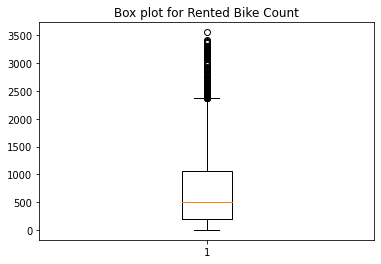

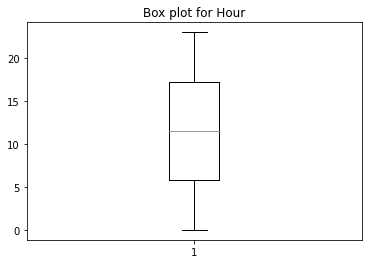

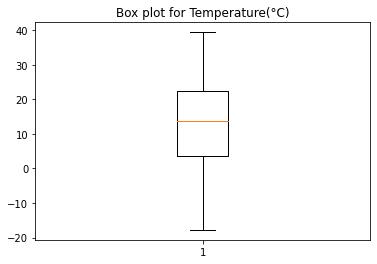

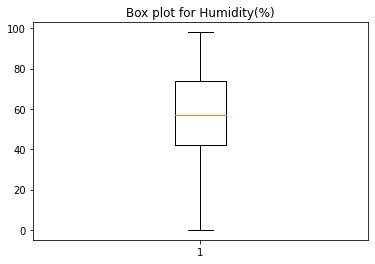

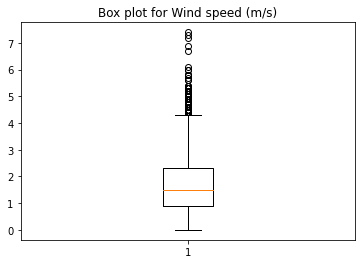

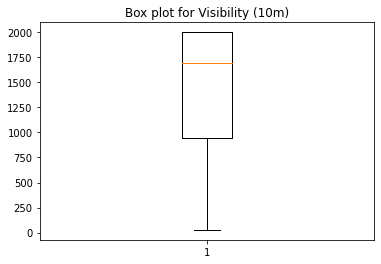

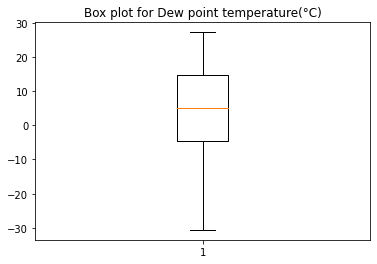

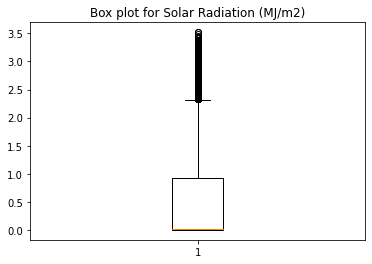

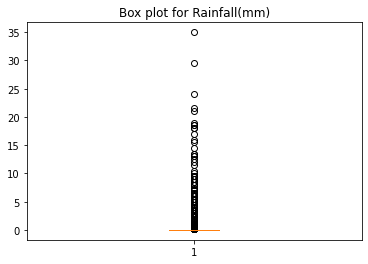

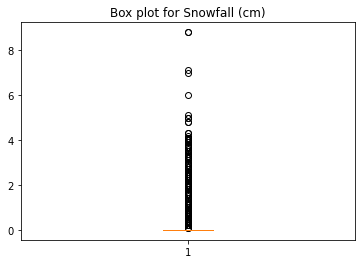

In [258]:
for cols in data_frame.columns:
    if data_frame[cols].dtype!='O':
        plt.title('Box plot for '+cols)
        plt.boxplot(data_frame[cols])
        plt.show()

In [261]:
for cols in data_frame.columns:
    if data_frame[cols].dtype!='O':
        data=data_frame.copy()
        if (0 not in data[cols].unique())&(cols!='Visibility (10m)'):
            data[cols]=np.log(data[cols])
            plt.title('Box plot for '+cols)
            plt.boxplot(data[cols])
            plt.show()